<h1 style="text-align:center;"><span style="color:#011f4b; font-size:20px; "> WELCOME TO YOUR FINAL EXAM TASK </span></h1>

<span style="color:#011f4b; font-size:15px; "> You have 150 minutes to complete this task. So, please, make this time useful </span>

<span style="color:#011f4b; font-size:15px; "><b>Pay attention to the file name - your file should be named as "FE_LName_FName_group" .</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied. 
</span>

<span style="color:#011f4b; font-size:15px; "> You have <b>3 tasks</b> </span>

<span style="color:#011f4b; font-size:15px; ">  <br/>
    Dataset Description:<br/>
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( Low - High )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )
</span>

<span style="color:#011f4b; font-size:15px; ">  You have <b>3 main tasks</b><br/>
    1. To perform EDA
    2. To train the Linear Regression Model (RMSE)
    3. To apply Regulirization on your model

<span style="color:#011f4b; font-size:15px; ">
    <b>Your Score decomposition:</b>
    <li>EDA - 40 %</li>
     <li>Linear Regression - 30%</li>
    <li> Regulirization - 15%</li>
 <li>The organization(comments, markdowns etc.) of your notebook - 15%</li>
 </span>

<span style="color:#011f4b; font-size:15px; ">
 <h3>Task 1 EDA</h3>

Firstly, we need to import all necessary packages:

In [8]:
#Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
from sklearn.linear_model import LinearRegression
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing

%matplotlib inline
sns.set(color_codes=True)

And set maximum displayed column number to 7:

In [9]:
#Your code goes here
pd.set_option('display.max_columns', 500)

In [15]:
#Your code goes here
df = pd.read_csv('Admission_prediction.csv')
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1.0,337.0,118.0,4.0,NaN,4.5,9.65,1,0.92
1,1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5.0,314.0,103.0,2.0,NaN,3.0,8.21,0,0.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Serial No.         491 non-null    float64
 2   GRE Score          493 non-null    float64
 3   TOEFL Score        420 non-null    float64
 4   University Rating  418 non-null    float64
 5   SOP                417 non-null    float64
 6   LOR                496 non-null    float64
 7   CGPA               487 non-null    float64
 8   Research           500 non-null    int64  
 9   Chance of Admit    500 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 39.2 KB


In [12]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,491.000000,493.000000,420.000000,418.000000,417.000000,496.000000,487.000000,500.000000,500.00000
mean,249.500000,249.270876,316.375254,107.126190,3.122010,3.362110,3.483871,8.568932,0.560000,0.72174
std,144.481833,144.736714,11.212252,6.023485,1.142988,0.977907,0.925367,0.606402,0.496884,0.14114
min,0.000000,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000
25%,124.750000,124.500000,308.000000,103.000000,2.000000,2.500000,3.000000,8.120000,0.000000,0.63000
50%,249.500000,248.000000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000
75%,374.250000,375.500000,325.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.82000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


Now I see that the dataset does have NaN values. That's why I need to drop them.

In [16]:
df = df.dropna()
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,5,6.0,330.0,115.0,5.0,4.5,3.0,9.34,1,0.90
7,7,8.0,308.0,101.0,2.0,3.0,4.0,7.90,0,0.68
...,...,...,...,...,...,...,...,...,...,...
493,493,494.0,300.0,95.0,2.0,3.0,1.5,8.22,1,0.62
494,494,495.0,301.0,99.0,3.0,2.5,2.0,8.45,1,0.68
496,496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
498,498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [17]:
df_num = df.select_dtypes(exclude=['object'])
z = np.abs(stats.zscore(df_num))
df = df[(z < 3).all(axis=1)]
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,5,6.0,330.0,115.0,5.0,4.5,3.0,9.34,1,0.90
7,7,8.0,308.0,101.0,2.0,3.0,4.0,7.90,0,0.68
...,...,...,...,...,...,...,...,...,...,...
493,493,494.0,300.0,95.0,2.0,3.0,1.5,8.22,1,0.62
494,494,495.0,301.0,99.0,3.0,2.5,2.0,8.45,1,0.68
496,496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
498,498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


The dataset doesn't seem to have any outliers.

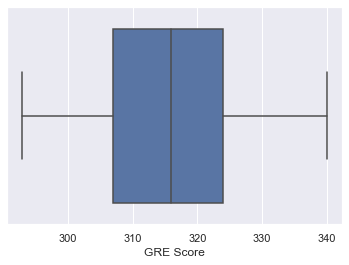

In [19]:
sns.boxplot(x=df['GRE Score'])

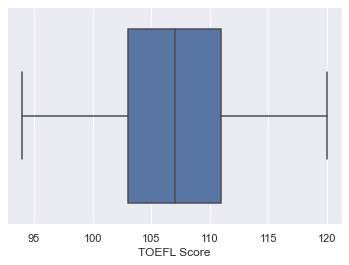

In [20]:
sns.boxplot(x=df['TOEFL Score'])

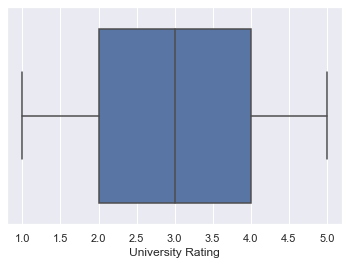

In [22]:
sns.boxplot(x=df['University Rating'])

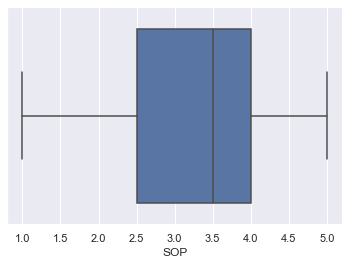

In [23]:
sns.boxplot(x=df['SOP'])

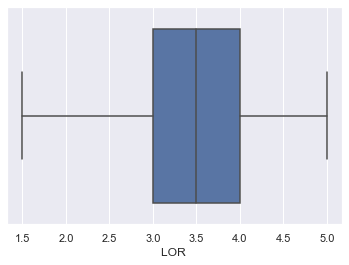

In [25]:
sns.boxplot(x=df['LOR '])

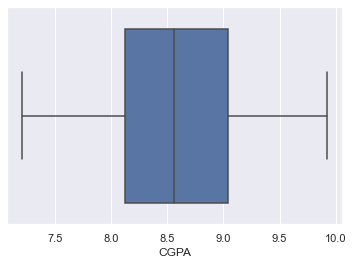

In [26]:
sns.boxplot(x=df['CGPA'])

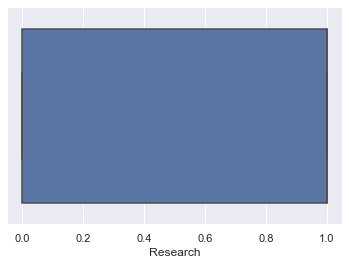

In [27]:
sns.boxplot(x=df['Research'])

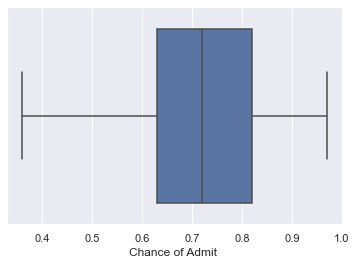

In [29]:
sns.boxplot(x=df['Chance of Admit '])

Now we should check if there's any relation between the features.

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Unnamed: 0,1.000000,1.000000,-0.110550,-0.200849,-0.070926,-0.149543,0.024347,-0.110684,0.001818,0.009306
Serial No.,1.000000,1.000000,-0.110550,-0.200849,-0.070926,-0.149543,0.024347,-0.110684,0.001818,0.009306
GRE Score,-0.110550,-0.110550,1.000000,0.827726,0.611553,0.605807,0.482332,0.840153,0.552869,0.803107
TOEFL Score,-0.200849,-0.200849,0.827726,1.000000,0.599532,0.621116,0.473907,0.803693,0.484384,0.775406
University Rating,-0.070926,-0.070926,0.611553,0.599532,1.000000,0.682932,0.559202,0.687364,0.399401,0.655230
SOP,-0.149543,-0.149543,0.605807,0.621116,0.682932,1.000000,0.643055,0.696082,0.399310,0.665103
LOR,0.024347,0.024347,0.482332,0.473907,0.559202,0.643055,1.000000,0.584888,0.326341,0.621165
CGPA,-0.110684,-0.110684,0.840153,0.803693,0.687364,0.696082,0.584888,1.000000,0.485456,0.866118
Research,0.001818,0.001818,0.552869,0.484384,0.399401,0.399310,0.326341,0.485456,1.000000,0.531297
Chance of Admit,0.009306,0.009306,0.803107,0.775406,0.655230,0.665103,0.621165,0.866118,0.531297,1.000000


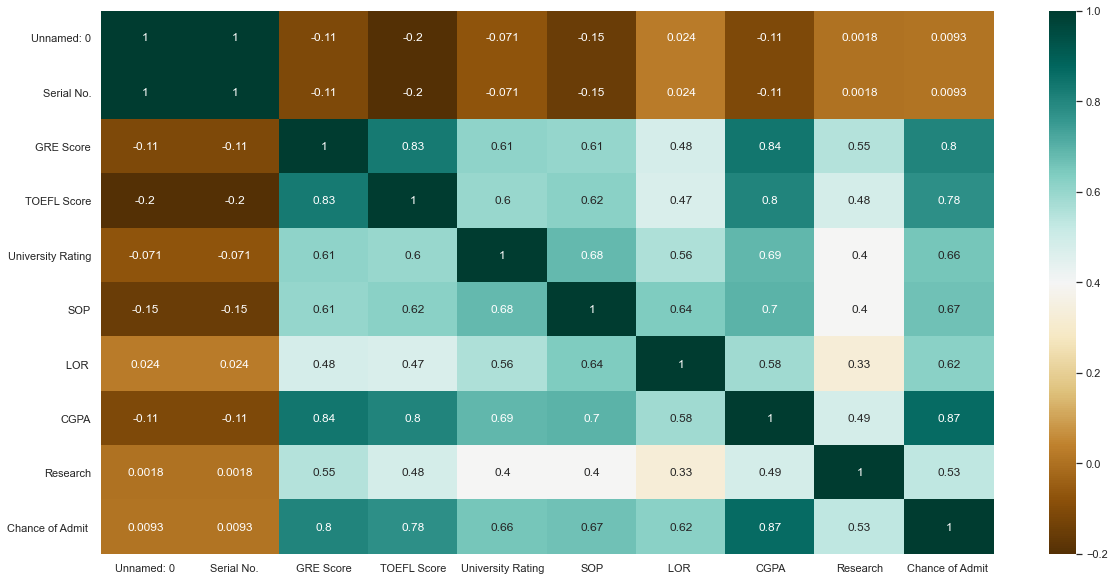

In [37]:
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

Henceforth, I am going to take CGPA, GRE Score and TOEFL Score as independent features and Chance of Admit as a dependent one.

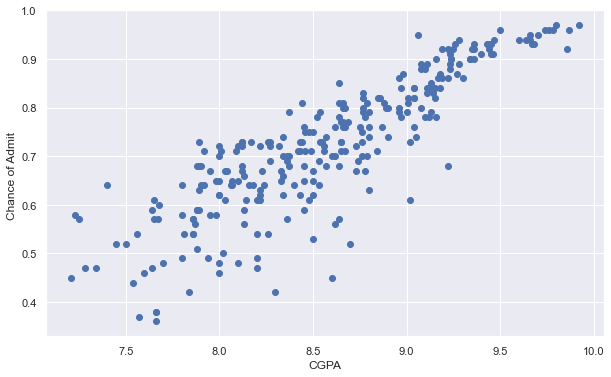

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['CGPA'], df['Chance of Admit '])
ax.set_xlabel('CGPA')
ax.set_ylabel('Chance of Admit ')
plt.show()

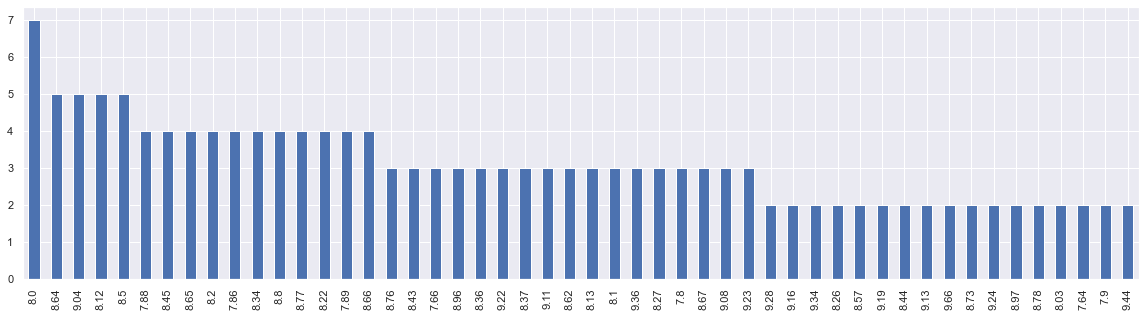

In [51]:
df['CGPA'].value_counts().nlargest(50).plot(kind='bar', figsize=(20,5))

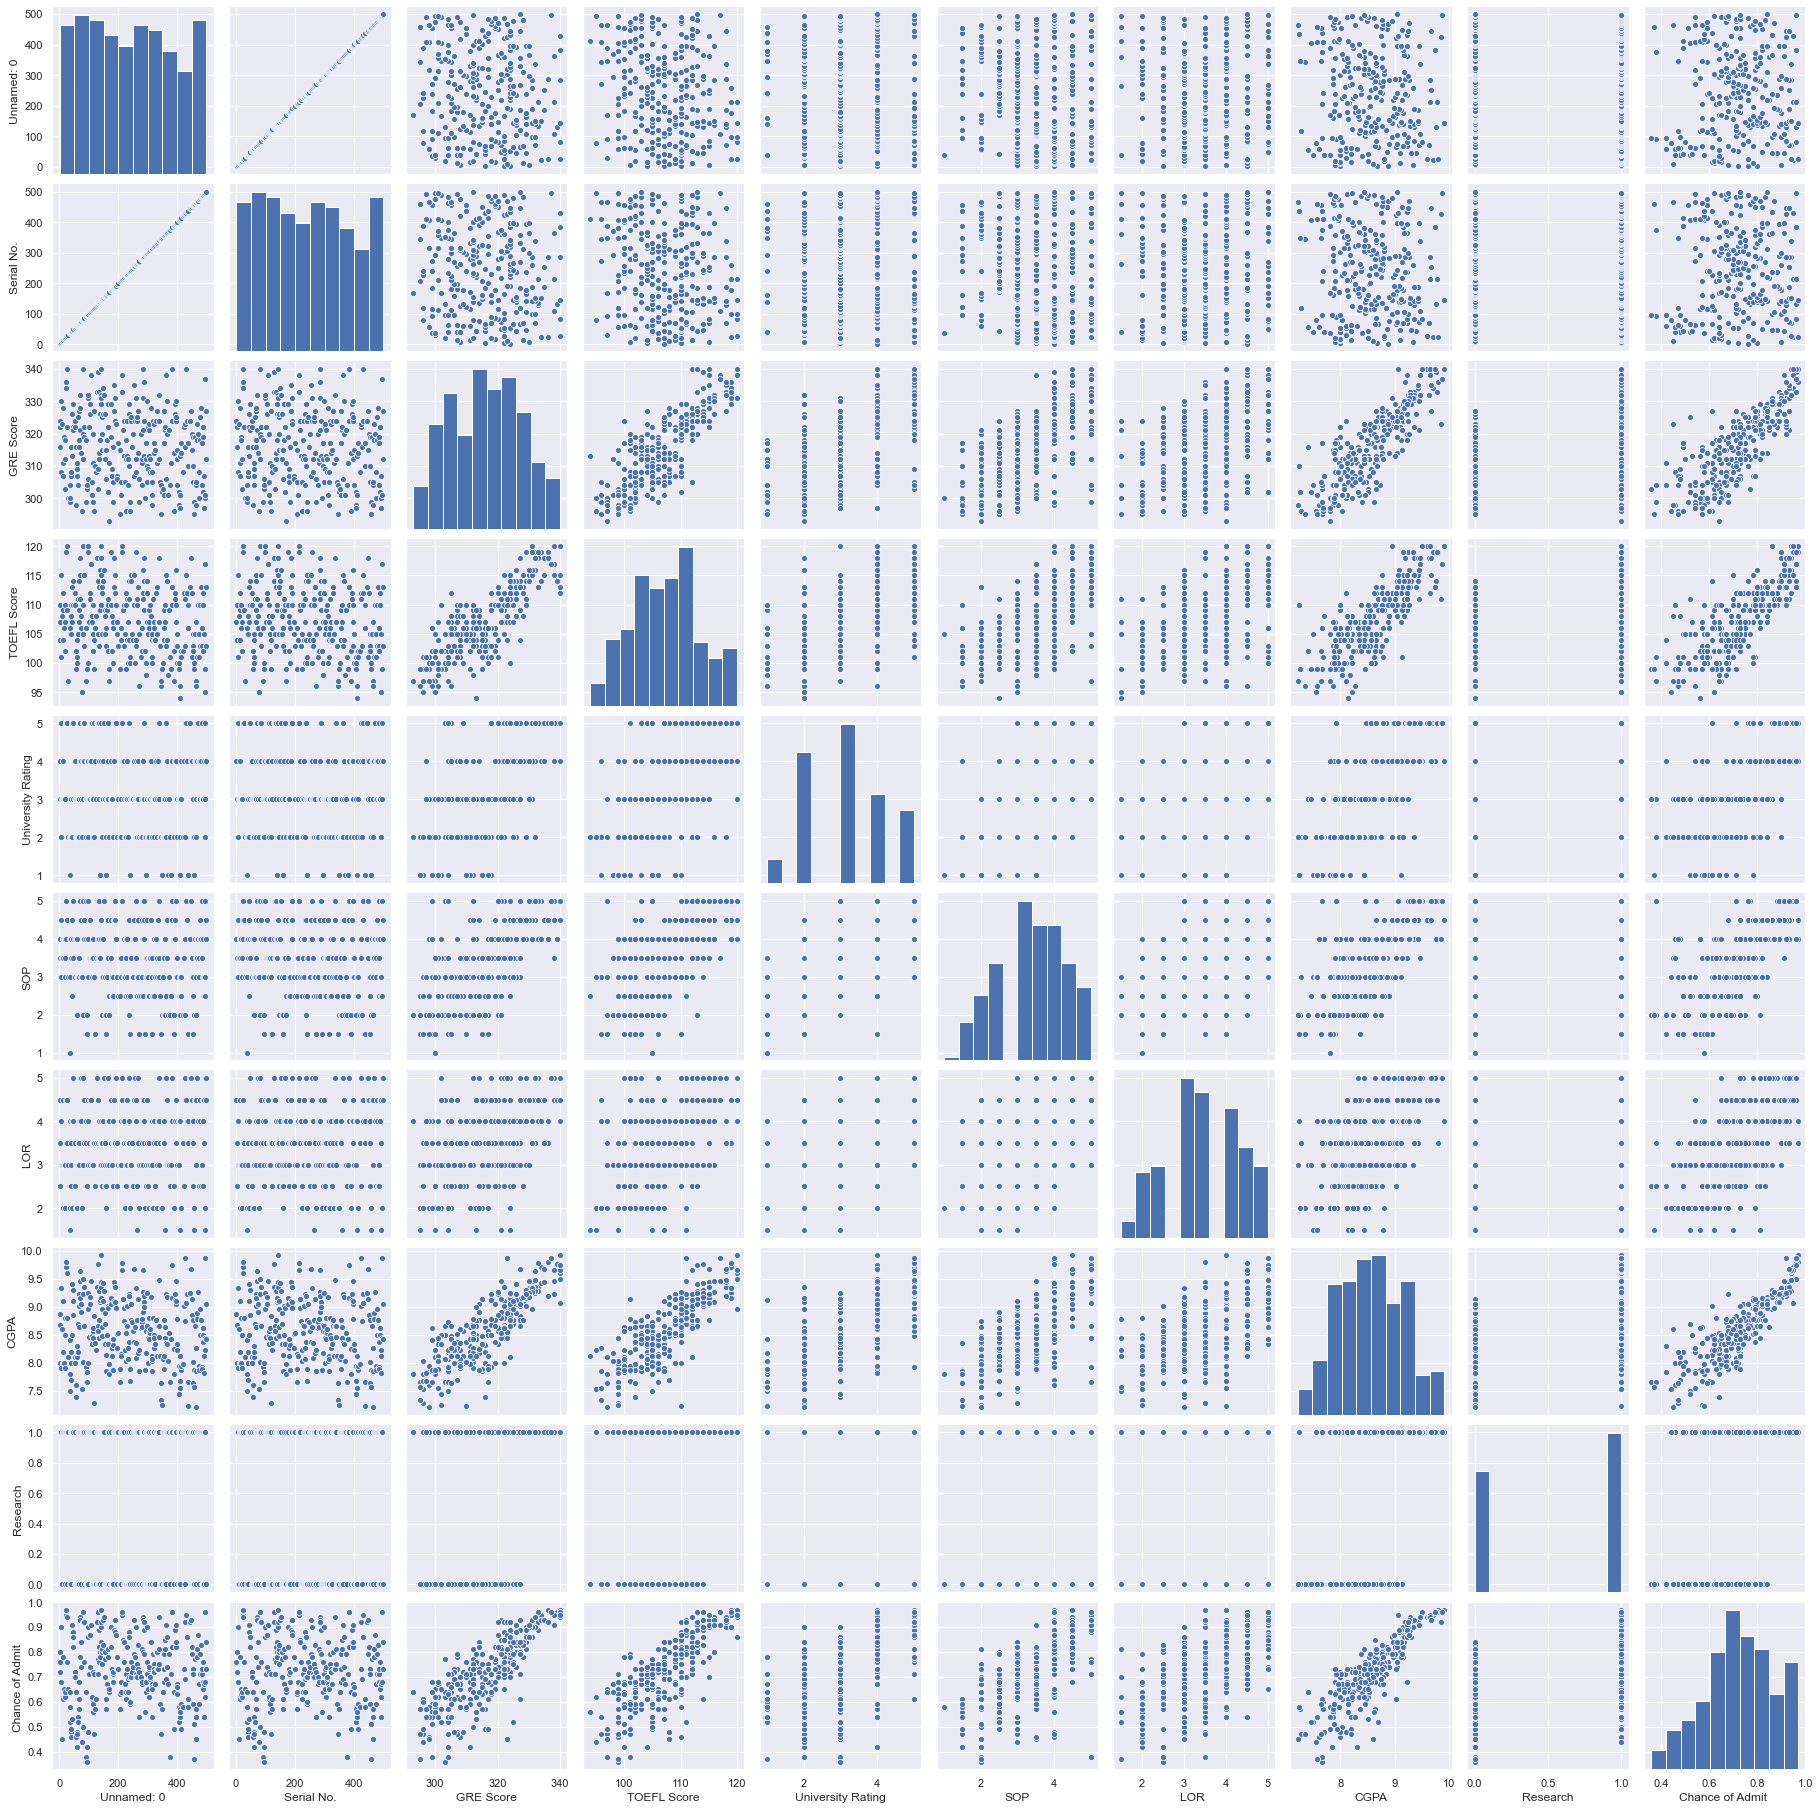

In [45]:
sns.pairplot(df)

<span style="color:#011f4b; font-size:15px; ">
 <h3>Task 2 Linear Regression Model</h3>

**Visualisation**

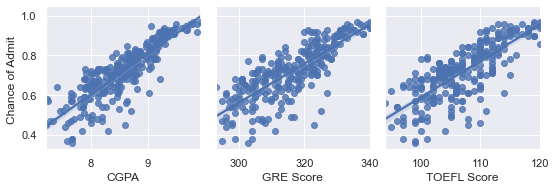

In [60]:
feature_cols = ['CGPA', 'GRE Score', 'TOEFL Score']

sns.pairplot(df, x_vars=feature_cols, y_vars='Chance of Admit ', kind='reg')

**SK Learn — Setting variables**

In [117]:
X = df[feature_cols]
y = df['Chance of Admit ']

**SK Learn — Training our model**

In [118]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Interpreting Coefficients**

In [119]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.551043584919101
[0.14033945 0.00221814 0.00343292]


In [120]:
print(dict(zip(feature_cols, lin_reg.coef_)))

{'CGPA': 0.14033944666121628, 'GRE Score': 0.0022181358289395164, 'TOEFL Score': 0.0034329170103869363}


**Making predictions based on the model**

In [121]:
y_pred = lin_reg.predict(X)

**Model Evaluation**

In [122]:
lin_reg.score(X,y)

0.7753841142766573

In [125]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [126]:
rmse

0.0585428937751012

<span style="color:#011f4b; font-size:15px; ">
 <h3>Task 3 Reguralisation</h3>

**Ridge regression**

In [147]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_reg = Ridge(alpha=0.001, normalize=True)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X_test)

print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error :  0.058542971351069034


**RidgeCV: ridge regression with built-in cross-validation of the alpha parameter**

In [137]:
alpha_range = 10.**np.arange(-2, 3)

ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True)
ridgeregcv.fit(X, y)
ridgeregcv.alpha_

0.01

In [141]:
y_pred = ridgeregcv.predict(X_test)

In [142]:
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error :  0.05855390962377669


**Lasso regression**

In [152]:
from sklearn.linear_model import Lasso, LassoCV

lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X, y)
print(lassoreg.coef_)

[0.12941985 0.00173909 0.00228873]


In [153]:
y_pred = lassoreg.predict(X_test)

In [154]:
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error :  0.06098260226315829


**LassoCV: lasso regression with built-in cross-validation of the alpha parameter**

In [156]:
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)
print(lassoregcv.coef_)

alpha :  4.9322483671706195e-05
[0.14026093 0.00193199 0.00385578]


In [157]:
y_pred = lassoregcv.predict(X_test)

In [158]:
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error :  0.05882954387295423
